In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/health/health_v1.csv')
df.head()

,ID;Weight;Smoking;Exercise;Cholesterol;Income;Happiness;BirthYear;Sex
1;75;0;3;5,8;3230;59;1964;1
2;70;0;6;5,9;1420;43;1952;1
3;76;0;6;6;4930;74;1951;1,NaN
4;62;0;8;4,7;2970;58;1959;1
5;44;0;8;4,3;4780;64;1925;1


In [2]:
df = pd.read_csv('datasets/health/health_v1.csv', sep=';', na_values='NaN')
df.head(20)

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3,"5,8",3230,59.0,1964,1
1,2,70.0,0.0,6,"5,9",1420,43.0,1952,1
2,3,76.0,0.0,6,6,4930,74.0,1951,1
3,4,62.0,0.0,8,"4,7",2970,58.0,1959,1
4,5,44.0,0.0,8,"4,3",4780,64.0,1925,1
5,6,74.0,0.0,6,"5,3",2610,43.0,1953,1
6,7,85.0,0.0,8,"2,8",3480,81.0,1990,2
7,8,66.0,0.0,6,"5,3",360,45.0,1952,1
8,9,67.0,0.0,7,"4,9",3920,82.0,1941,1
9,10,82.0,0.0,3,"5,1",2510,33.0,1952,1


In [3]:
df.dtypes


ID               int64
Weight         float64
Smoking        float64
Exercise        object
Cholesterol     object
Income          object
Happiness      float64
BirthYear       object
Sex             object
dtype: object

Muutetaan tietotyyppia, Exercise arvo, jossa on tyhje.

In [6]:
df['Exercise'] = df['Exercise'].astype(int)
df['Income'] = df['Income'].astype(int)
df['BirthYear'] = df['BirthYear'].astype(int)
df['Sex'] = pd.Categorical(df['Sex'])


ValueError: invalid literal for int() with base 10: ' '

In [7]:
df = pd.read_csv('datasets/health/health_v1.csv', sep=';', na_values=['', ' '], decimal=',')
df.Exercise.unique()

array([ 3.,  6.,  8.,  7.,  5.,  4.,  2.,  9., 10.,  0.,  1., nan])

In [8]:
df.dtypes

ID               int64
Weight         float64
Smoking        float64
Exercise       float64
Cholesterol    float64
Income         float64
Happiness      float64
BirthYear      float64
Sex             object
dtype: object

replace

In [17]:
df['Sex'] = df['Sex'].astype(str)
df.Sex.unique()
df['Sex'] = df['Sex'].replace({'Male': '1', 'Female': '2'})
df['Sex'] = df['Sex'].astype('category')

In [18]:
df.dtypes

ID                int64
Weight          float64
Smoking         float64
Exercise        float64
Cholesterol     float64
Income          float64
Happiness       float64
BirthYear       float64
Sex            category
dtype: object

In [19]:
# re-encode Sex with values 5 and6
df.describe(include='all')

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
count,1000.000000,999.000000,999.000000,998.000000,1000.00000,997.000000,999.000000,999.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523
mean,500.500000,79.717718,0.232232,5.092184,5.72750,3069.829488,51.171171,1954.111111,NaN
std,288.819436,25.252719,0.422468,2.030736,1.39649,1264.497563,17.511569,21.443328,NaN
min,1.000000,8.000000,0.000000,0.000000,-7.50000,0.000000,0.000000,1879.000000,NaN
25%,250.750000,70.000000,0.000000,4.000000,4.87500,2220.000000,39.000000,1939.000000,NaN
50%,500.500000,80.000000,0.000000,5.000000,5.80000,3140.000000,50.000000,1954.000000,NaN
75%,750.250000,88.000000,0.000000,6.000000,6.60000,3890.000000,63.000000,1969.000000,NaN


mean: keskiarvo


In [22]:
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(3, 3, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

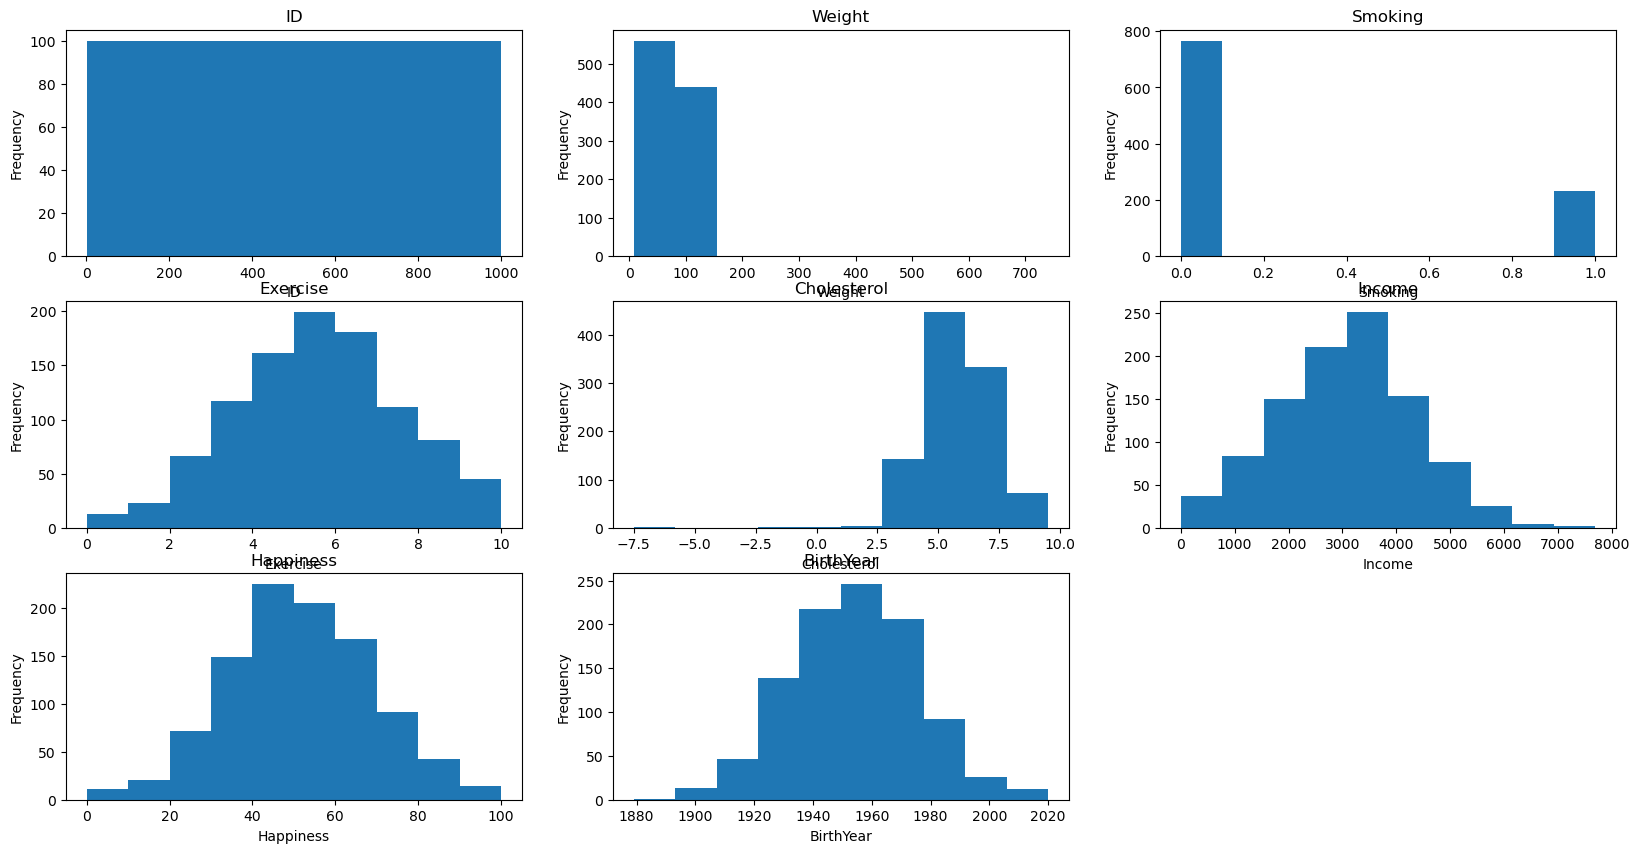

In [23]:
plot_data(df)

In [30]:
df.rename(columns={'Smoking': 'Smoker'}, inplace=True)
df

,ID,Weight,Smoker,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3.0,5.8,3230.0,59.0,1964.0,1
1,2,70.0,0.0,6.0,5.9,1420.0,43.0,1952.0,1
2,3,76.0,0.0,6.0,6.0,4930.0,74.0,1951.0,1
3,4,62.0,0.0,8.0,4.7,2970.0,58.0,1959.0,1
4,5,44.0,0.0,8.0,4.3,4780.0,64.0,1925.0,1
...,...,...,...,...,...,...,...,...,...
995,996,106.0,1.0,1.0,9.4,0.0,0.0,1919.0,2
996,997,77.0,1.0,4.0,6.6,2990.0,45.0,1971.0,2
997,998,71.0,0.0,8.0,4.5,4840.0,74.0,1935.0,2
998,999,107.0,1.0,2.0,8.4,2030.0,38.0,1929.0,2


In [29]:
import seaborn as sns
#print his
sns.histplot([df('Happiness')])
sns.relplot([df('Weight')])
sns.relplot([df('Happiness')])



TypeError: 'DataFrame' object is not callable

In [ ]:
df.loc[(df['Weight'])] < 30 | (df['Weight'] > 200), 'Weight'] = 

In [ ]:
np.random.seed(42)
df['Group'] 